In [2]:
import sys
sys.path.insert(0, '..')
from pyecg.utils import *
from pyecg.data_handling import DataHandling
from pyecg.data_augmentation import *
from pyecg.data_handling import DS1,DS2

# Train SET

In [ ]:
#train set
dh = DataHandling(base_path='../data', win=[100,200],remove_bl=False,lowpass=False)
dh.save_dataset(records=DS1, save_file_name='DS1.dat')
ds = dh.load_data(load_file_name='DS1.dat')
x_train, y_train, r_train = ds.values()

In [ ]:
x_train.shape, len(y_train), len(r_train), len(r_train[0])

In [ ]:
statReport = dh.report_stats_table([y_train],['train'])
statReport

In [ ]:
mean_train = np.mean(x_train)
std_train = np.std(x_train)
def stndr(arr,mean,std):
    X = arr.copy()
    X = (X - np.mean(X)) / np.std(X)
    return X

In [ ]:
print(mean_train, std_train)

In [ ]:
#x_train=stndr(x_train,mean_train,std_train)

In [ ]:
from py.data_preprocessing import DataPreprocessing
dpr = DataPreprocessing()
features_train = dpr.specgram(x_train, Fs= fs, nperseg=win, noverlap=overlap)
features_train.shape

In [ ]:
save_data(features_train, y_train, file_path = '../data/DS1_features.dat')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val  = train_test_split(features_train, y_train, 
                                                   test_size=0.50,stratify = y_train, 
                                                   random_state=86, shuffle=True)  #seed: 78,86

In [ ]:
statReport = dh.report_stats_table([y_train,y_val],['train','val'])
statReport

In [ ]:
save_data(x_train, y_train, file_path = '../data/DS1_features_train.dat')
save_data(x_val, y_val, file_path = '../data/DS1_features_val.dat')

# Augment

In [ ]:
#x_train_aug, y_train_aug = aug_decrease(x_train, y_train, label='N', desired_size = 5000)
x_train_aug, y_train_aug = aug_increase(x_train, y_train, desired_size = 2000)
statReport = dh.report_stats_table([y_train_aug])
statReport

In [ ]:
#x_val_aug, y_val_aug = aug_decrease(x_val, y_val, label='N', desired_size = 2200)
x_val_aug, y_val_aug = aug_increase(x_val, y_val, desired_size = 1000)
statReport = dh.report_stats_table([y_val_aug])
statReport

In [ ]:
save_data(x_train_aug, y_train_aug, file_path = '../data/DS1_features_train.dat')
#save_data(x_val_aug, y_val_aug, file_path = '../data/DS1_features_val.dat')

# Raw

In [1]:
import sys
sys.path.insert(0, '..')
from pyecg.utils import *
from pyecg.data_handling import DataHandling
from pyecg.data_augmentation import *
from pyecg.data_handling import DS1,DS2 

2022-06-09 17:55:53.880234: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-09 17:55:53.880275: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-09 17:56:50.296113: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-09 17:56:50.296166: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-09 17:56:50.296207: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2022-06-09 17:56:50.296653: I tensorflow/core/platform/cpu_feature_gua

In [2]:
#train set
dh = DataHandling(base_path='../data', win=[500,500],remove_bl=True,lowpass=True)
dh.save_dataset(records=DS1[:18], save_file_name='train.beat')
ds = dh.load_data(file_name='train.beat')
x_train, r_train, y_train = ds.values() 
x_train.shape, r_train.shape, y_train.shape 

100%|█████████████████████████████████████| 38949/38949 [07:54<00:00, 82.07it/s]


file saved: ../data/train.beat
file loaded: ../data/train.beat
shape of "waveforms" is (38949, 1000)
shape of "beat_feats" is (38949, 62)
shape of "labels" is (38949,)
                N     L     R   j  e     V    E    A  S   a   J    F  f  /  Q
train.beat  27374  3849  3570  14  0  2931  105  580  2  97  32  387  0  0  8


((38949, 1000), (38949, 62), (38949,))

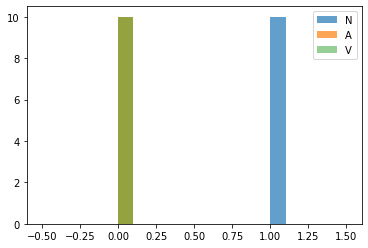

In [4]:
from pyecg.data_handling import slice_data
import matplotlib.pyplot as plt


ftno = 9
ds_trainA = slice_data(ds, {'N':0})
x_trainA, r_trainA, y_trainA = ds_trainA.values()
plt.hist(r_trainA[:,ftno],density=True, alpha=0.7)

ds_trainA = slice_data(ds, {'A':1})
x_trainA, r_trainA, y_trainA = ds_trainA.values()
plt.hist(r_trainA[:,ftno],density=True, alpha=0.7)

ds_trainN = slice_data(ds, {'V':2})
x_trainN, r_trainN, y_trainN = ds_trainN.values()
plt.hist(r_trainN[:,ftno],density=True, alpha=0.5)

plt.legend(['N','A','V'])

In [3]:
#val set
dh.save_dataset(records=DS1[18:], save_file_name='val.beat')
ds = dh.load_data(file_name='val.beat')
x_val, r_val, y_val = ds.values()
x_val.shape

100%|███████████████████████████████████████| 9872/9872 [01:59<00:00, 82.68it/s]


file saved: ../data/val.beat
file loaded: ../data/val.beat
shape of "waveforms" is (9872, 1000)
shape of "beat_feats" is (9872, 62)
shape of "labels" is (9872,)
             N  L  R  j   e    V  E    A  S  a  J   F  f  /  Q
val.beat  9049  0  0  0  16  625  0  166  0  1  0  15  0  0  0


(9872, 1000)

In [4]:
stat_report = dh.report_stats_table([y_train,y_val],['train','val'])
stat_report

,N,L,R,j,e,V,E,A,S,a,J,F,f,/,Q
train,27374,3849,3570,14,0,2931,105,580,2,97,32,387,0,0,8
val,9049,0,0,0,16,625,0,166,0,1,0,15,0,0,0


In [5]:
import gc
del x_train, r_train, y_train, ds
del x_val, r_val, y_val
gc.collect()

0

In [6]:
#test set
dh.save_dataset(records=DS2, save_file_name='test.beat')
ds_test = dh.load_data(file_name='test.beat')
x_test, r_test, y_test = ds_test.values()

x_test.shape, r_test.shape, len(y_test)

statReport = dh.report_stats_table([y_test],['test'])
statReport

100%|█████████████████████████████████████| 47512/47512 [09:37<00:00, 82.24it/s]


file saved: ../data/test.beat
file loaded: ../data/test.beat
shape of "waveforms" is (47512, 1000)
shape of "beat_feats" is (47512, 62)
shape of "labels" is (47512,)
               N     L     R    j  e     V  E     A  S   a   J    F  f  /  Q
test.beat  34811  3937  3300  213  0  3104  1  1657  0  48  51  383  0  0  7


,N,L,R,j,e,V,E,A,S,a,J,F,f,/,Q
test,34811,3937,3300,213,0,3104,1,1657,0,48,51,383,0,0,7


# Single record

In [1]:
import sys
sys.path.insert(0, '..')
from pyecg.utils import *
from pyecg.data_handling import DataHandling
from pyecg.data_augmentation import *
from pyecg.data_handling import DS1,DS2 

2022-06-09 16:48:49.571861: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-09 16:48:49.571905: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-09 16:49:30.723678: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-09 16:49:30.723721: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-09 16:49:30.723754: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2022-06-09 16:49:30.724123: I tensorflow/core/platform/cpu_feature_gua

In [8]:
#train set
dh = DataHandling(base_path='../data', win=[500,500],remove_bl=True,lowpass=True)
dh.save_dataset_single(record=DS2[9], split_ratio=0.4, save_file_name='single')

100%|███████████████████████████████████████| 2036/2036 [00:25<00:00, 79.80it/s]


2036
2036
file saved: ../data/single_train.beat
file saved: ../data/single_test.beat


In [9]:
ds = dh.load_data(file_name='single_train.beat')
x_train, r_train, y_train = ds.values()
x_train.shape, r_train.shape, y_train.shape
ds = dh.load_data(file_name='single_test.beat')
x_train, r_train, y_train = ds.values()
x_train.shape, r_train.shape, y_train.shape

file loaded: ../data/single_train.beat
shape of "waveforms" is (814, 1000)
shape of "beat_feats" is (814, 60)
shape of "labels" is (814,)
                     N  L  R  j  e   V  E   A  S  a  J  F  f  /  Q
single_train.beat  780  0  0  0  0  16  0  15  0  3  0  0  0  0  0
file loaded: ../data/single_test.beat
shape of "waveforms" is (1222, 1000)
shape of "beat_feats" is (1222, 60)
shape of "labels" is (1222,)
                     N  L  R  j  e  V  E   A  S   a  J  F  f  /  Q
single_test.beat  1182  0  0  0  0  2  0  21  0  16  0  1  0  0  0


((1222, 1000), (1222, 60), (1222,))

# Intra

In [1]:
import sys
sys.path.insert(0, '..')
from pyecg.utils import *
from pyecg.data_handling import DataHandling
from pyecg.data_augmentation import *
from pyecg.data_handling import DS1,DS2 

2022-06-03 14:43:02.387189: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-03 14:43:02.387225: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-03 14:43:08.878650: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-03 14:43:08.878687: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-03 14:43:08.878724: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2022-06-03 14:43:08.879036: I tensorflow/core/platform/cpu_feature_gua

In [2]:
#train set
dh = DataHandling(base_path='../data', win=[120,180],remove_bl=True,lowpass=True)
dh.save_dataset_intra(records=DS1, split_ratio=0.7, save_file_name='intra')

100%|████████████████████████████████████████████████████████████████| 1845/1845 [00:19<00:00, 95.94it/s]


1845
1845


100%|████████████████████████████████████████████████████████████████| 2007/2007 [00:21<00:00, 92.65it/s]


2007
2007


100%|████████████████████████████████████████████████████████████████| 1743/1743 [00:18<00:00, 92.30it/s]


1743
1743


100%|████████████████████████████████████████████████████████████████| 2512/2512 [00:26<00:00, 96.09it/s]


2512
2512


100%|████████████████████████████████████████████████████████████████| 2519/2519 [00:26<00:00, 93.91it/s]


2519
2519


100%|████████████████████████████████████████████████████████████████| 1859/1859 [00:19<00:00, 93.32it/s]


1859
1859


100%|████████████████████████████████████████████████████████████████| 1933/1933 [00:20<00:00, 95.60it/s]


1933
1933


100%|████████████████████████████████████████████████████████████████| 2392/2392 [00:24<00:00, 95.80it/s]


2392
2392


100%|████████████████████████████████████████████████████████████████| 2258/2258 [00:24<00:00, 93.65it/s]


2258
2258


100%|████████████████████████████████████████████████████████████████| 1967/1967 [00:20<00:00, 95.79it/s]


1967
1967


100%|████████████████████████████████████████████████████████████████| 2456/2456 [00:25<00:00, 96.78it/s]


2456
2456


100%|████████████████████████████████████████████████████████████████| 1599/1599 [00:16<00:00, 96.47it/s]


1599
1599


100%|████████████████████████████████████████████████████████████████| 1943/1943 [00:19<00:00, 97.27it/s]


1943
1943


100%|████████████████████████████████████████████████████████████████| 2960/2960 [00:30<00:00, 97.53it/s]


2960
2960


100%|████████████████████████████████████████████████████████████████| 2636/2636 [00:27<00:00, 95.67it/s]


2636
2636


100%|████████████████████████████████████████████████████████████████| 1840/1840 [00:19<00:00, 94.73it/s]


1840
1840


100%|████████████████████████████████████████████████████████████████| 2935/2935 [00:29<00:00, 99.14it/s]


2935
2935


100%|████████████████████████████████████████████████████████████████| 2985/2985 [00:30<00:00, 98.88it/s]


2985
2985


100%|████████████████████████████████████████████████████████████████| 3343/3343 [00:33<00:00, 99.40it/s]


3343
3343


100%|████████████████████████████████████████████████████████████████| 2028/2028 [00:22<00:00, 91.40it/s]


2028
2028


100%|████████████████████████████████████████████████████████████████| 2585/2585 [00:26<00:00, 99.11it/s]


2585
2585


100%|███████████████████████████████████████████████████████████████| 2236/2236 [00:21<00:00, 103.30it/s]


2236
2236
file saved: ../data/intra_train.beat
file saved: ../data/intra_test.beat


In [4]:
ds = dh.load_data(file_name='intra_train.beat')
x_train, r_train, y_train = ds.values()
x_train.shape, r_train.shape, y_train.shape
ds = dh.load_data(file_name='intra_test.beat')
x_train, r_train, y_train = ds.values()
x_train.shape, r_train.shape, y_train.shape

file loaded: ../data/intra_train.beat
shape of "waveforms" is (35399, 300)
shape of "beat_feats" is (35399, 2)
shape of "labels" is (35399,)
                      N     L     R   j  e     V  E    A  S   a   J    F  f  \
intra_train.beat  26412  2840  2627  11  8  2535  0  547  2  47  32  335  0   

                  /  Q  
intra_train.beat  0  3  
file loaded: ../data/intra_test.beat
shape of "waveforms" is (15182, 300)
shape of "beat_feats" is (15182, 2)
shape of "labels" is (15182,)
                     N     L     R  j  e     V    E    A  S   a  J   F  f  /  \
intra_test.beat  11350  1090  1114  4  8  1128  105  250  0  51  0  77  0  0   

                 Q  
intra_test.beat  5  


((15182, 300), (15182, 2), (15182,))

# STFT

In [1]:
import sys
sys.path.insert(0, '..')
from pyecg.utils import *
from pyecg.data_handling import DataHandling
from pyecg.data_augmentation import *
from pyecg.data_handling import DS1,DS2

2022-04-21 08:38:04.281230: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-21 08:38:04.281256: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-21 08:38:05.633883: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-21 08:38:05.633904: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-21 08:38:05.633921: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mypc-zen): /proc/driver/nvidia/version does not exist
2022-04-21 08:38:05.634088: I tensorflow/core/platform/cpu_feature_g

In [ ]:
#train set
windows = [100,200]
dh = DataHandling(base_path='../data', win=windows,remove_bl=True,lowpass=False)
dh.save_dataset(records=DS1[2:], save_file_name='DS1_train.beat')
ds = dh.load_data(load_file_name='DS1_train.beat')
x_train, y_train, r_train = ds.values()

#val set
dh.save_dataset(records=DS1[:2], save_file_name='DS1_val.beat')
ds = dh.load_data(load_file_name='DS1_val.beat')
x_val, y_val, r_val = ds.values()

x_train.shape, r_train.shape, len(y_train), x_val.shape

  0%|                                                                 | 0/20 [00:00<?, ?it/s]

In [ ]:
statReport = dh.report_stats_table([y_train,y_val],['train','val'])
statReport

In [ ]:
#test set
dh.save_dataset(records=DS2,save_file_name='DS2.beat')
ds_test = dh.load_data(load_file_name='DS2.beat')
x_test, y_test, r_test = ds_test.values()

print(x_test.shape)

statReport = dh.report_stats_table([y_test],['test'])
statReport

In [ ]:
#STFT
from pyecg.data_preprocessing import STFT
dpr = STFT()
fs = 360
win = 80 #127 #64 79
overlap = 73 #122  #32 73
print(dpr.calc_feat_dim(sum(windows),win,overlap))

#training set
x_train_stft = dpr.specgram(x_train, Fs= fs, nperseg=win, noverlap=overlap)
print(x_train_stft.shape)

x_train_stft = x_train_stft[:,:,:32]

ds_train_stft = {'x':x_train_stft, 'y':y_train, 'r':r_train}
save_data(ds_train_stft, file_path = '../data/DS1_train_stft.beat')

In [ ]:
x_train_stft.shape

In [ ]:
#import matplotlib.pyplot as plt
#plt.imshow(x_train_stft[0])

In [ ]:
#val set
x_val_stft = dpr.specgram(x_val, Fs= fs, nperseg=win, noverlap=overlap)

x_val_stft = x_val_stft[:,:,:32]


print(x_val_stft.shape)
ds_val_stft = {'x':x_val_stft, 'y':y_val, 'r':r_val}
save_data(ds_val_stft, file_path = '../data/DS1_val_stft.beat')

In [ ]:
#test set
x_test_stft = dpr.specgram(x_test, Fs= fs, nperseg=win, noverlap=overlap)

x_test_stft = x_test_stft[:,:,:32]

print(x_test_stft.shape)
ds_test_stft = {'x':x_test_stft, 'y':y_test, 'r':r_test}
save_data(ds_test_stft, file_path = '../data/DS2_stft.dat')

In [ ]:
maxx = []
yy = []
avg = []
for i in range(x_train_stft.shape[0]):
    maxx.append(max(x_train_stft[i].flatten())) 
    avg.append(np.mean(x_train_stft[i].flatten()))
    yy.append(y_train[i])
    
dff = pd.DataFrame({'max':maxx,'avg':avg, 'label':yy})
dff[dff['max']>0.1].groupby(['label']).count()

# Beatinfo test code

In [1]:
import sys
sys.path.insert(0, '..')
from pyecg.utils import *
from pyecg.data_handling import DataHandling
from pyecg.data_augmentation import *
from pyecg.data_handling import DS1,DS2

windows = [400,400]
dh = DataHandling(base_path='../data', win=windows,remove_bl=True,lowpass=True)
rec_dict = dh.get_signal_data(record_num=108) #215 #108
signal,r_locations,r_labels,_,_ = rec_dict.values()

2022-06-09 11:02:01.861010: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-09 11:02:01.861083: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-09 11:03:01.717901: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-09 11:03:01.717938: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-09 11:03:01.717964: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2022-06-09 11:03:01.724694: I tensorflow/core/platform/cpu_feature_gua

In [2]:
len(r_locations),len(r_labels) 

(1763, 1763)

In [3]:
#r_locations[:40] 

In [4]:
beat_no = 24 #beat 25 --> 24
r_locations[beat_no+10] #beat 25--> 34  

12509

In [5]:
signal_frags, beat_types, r_locs, start_idxs = dh.make_frags(signal, r_locations, r_labels)

In [6]:
#r_locs[beat_no],len(r_locs[beat_no] )

In [7]:
rri=np.diff(r_locs[beat_no])/360*1000
rri

array([1088.88888889, 1083.33333333, 1047.22222222, 1005.55555556,
       1030.55555556,  500.        , 1602.77777778, 1016.66666667,
        986.11111111,  930.55555556,  963.88888889, 1055.55555556,
       1133.33333333, 1191.66666667, 1094.44444444, 1055.55555556,
       1041.66666667, 1105.55555556, 1105.55555556, 1069.44444444,
       1069.44444444, 1036.11111111, 1036.11111111, 1105.55555556,
       1097.22222222,  994.44444444, 1000.        , 1030.55555556,
       1072.22222222, 1086.11111111, 1091.66666667,  988.88888889,
       1016.66666667, 1022.22222222, 1050.        , 1036.11111111,
       1019.44444444, 1097.22222222, 1169.44444444, 1186.11111111,
       1158.33333333, 1100.        , 1061.11111111, 1069.44444444,
       1038.88888889, 1097.22222222, 1113.88888889, 1094.44444444,
       1011.11111111, 1058.33333333, 1075.        , 1122.22222222,
       1063.88888889,  986.11111111,  947.22222222,  983.33333333,
       1097.22222222, 1197.22222222, 1233.33333333, 1208.33333

In [8]:
sdrri = np.diff(rri)
sdrri

array([  -5.55555556,  -36.11111111,  -41.66666667,   25.        ,
       -530.55555556, 1102.77777778, -586.11111111,  -30.55555556,
        -55.55555556,   33.33333333,   91.66666667,   77.77777778,
         58.33333333,  -97.22222222,  -38.88888889,  -13.88888889,
         63.88888889,    0.        ,  -36.11111111,    0.        ,
        -33.33333333,    0.        ,   69.44444444,   -8.33333333,
       -102.77777778,    5.55555556,   30.55555556,   41.66666667,
         13.88888889,    5.55555556, -102.77777778,   27.77777778,
          5.55555556,   27.77777778,  -13.88888889,  -16.66666667,
         77.77777778,   72.22222222,   16.66666667,  -27.77777778,
        -58.33333333,  -38.88888889,    8.33333333,  -30.55555556,
         58.33333333,   16.66666667,  -19.44444444,  -83.33333333,
         47.22222222,   16.66666667,   47.22222222,  -58.33333333,
        -77.77777778,  -38.88888889,   36.11111111,  113.88888889,
        100.        ,   36.11111111,  -25.        ,  -77.77777

In [9]:
np.mean(sdrri)

-1.2906846240179544

In [11]:
x_beatinfo,labels = dh.beat_info_feat({'waveforms':signal_frags,
                                'rpeaks':r_locs, 
                                'rec_nums': [1]*len(start_idxs),
                                'start_idxs': start_idxs,
                                'labels':r_labels}, 
                                 beat_loc=50)

100%|██████████████████████████████████████████████████████████████| 1663/1663 [00:18<00:00, 91.98it/s]


In [14]:
(x_beatinfo[beat_no])

{'ratio_post_pre': 1.0157480314960676,
 'ratio_pre_avg': 0.9896103896103843,
 'ratio_post_avg': 1.0051948051948045,
 'maxmin_ratio': -0.39725115570502784,
 'beat_mean': -0.0064528514971660894,
 'beat_std': 0.14141477518037182,
 'beat_skewness': -2.3232173445401045,
 'beat_kurtosis': 7.655521451478963,
 'beat_rms': 0.14156192260547887,
 'pflag': 1,
 'sample1': 0.01962942085192435,
 'sample2': 0.02612875489089342,
 'sample3': 0.04241460280000497,
 'sample4': 0.05248056020892117,
 'sample5': 0.035602108722278605,
 'sample6': 0.050072837789980174,
 'sample7': 0.0738797117654323,
 'sample8': 0.12830071725086728,
 'sample9': 0.2218028894009817,
 'sample10': 0.2588267529980483,
 'sample11': 0.0019654938443099713,
 'sample12': -0.027288698922357895,
 'sample13': -0.036778053433482914,
 'sample14': -0.06893793906079078,
 'sample15': -0.04497902817854494,
 'sample16': -0.04458266051265096,
 'sample17': -0.09400496715263179,
 'sample18': -0.17471447496537965,
 'sample19': -0.36423449996638035,
 '

In [12]:
len(x_beatinfo[beat_no])

14

In [13]:
((x_beatinfo[beat_no]).keys())

dict_keys(['ratio_post_pre', 'maxmin_ratio', 'beat_mean', 'beat_rms', 'sample1', 'sample2', 'sample3', 'sample4', 'sample5', 'sample6', 'sample7', 'sample8', 'sample9', 'sample10'])

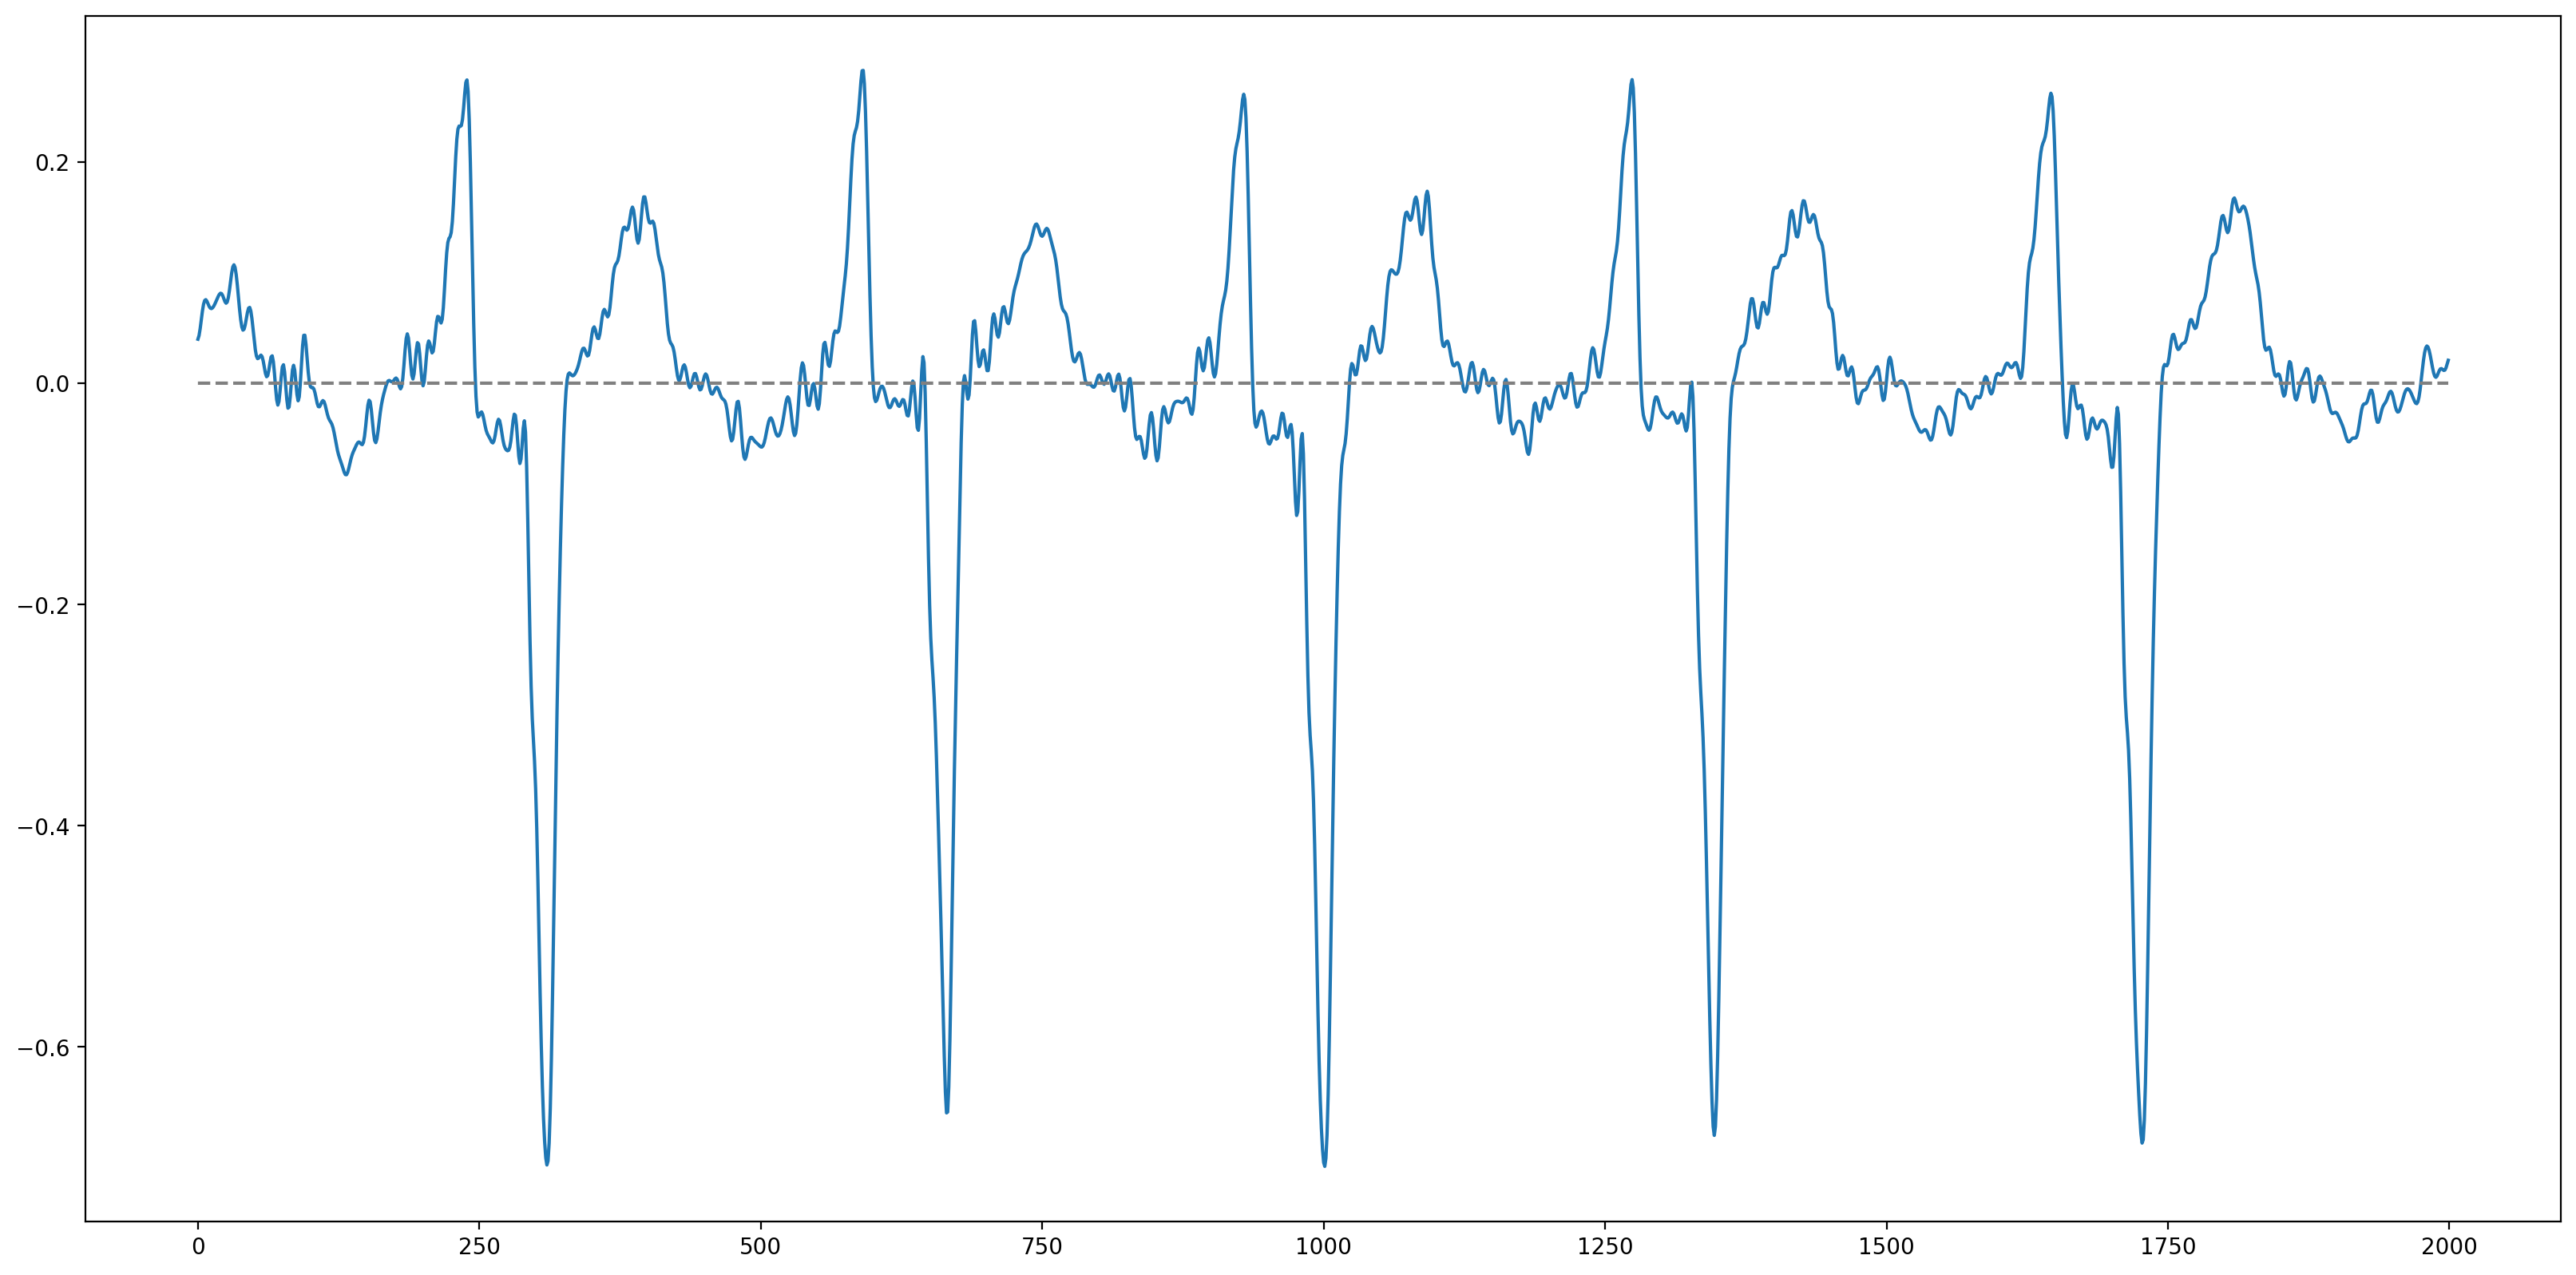

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10),dpi=200)
x = r_locations[beat_no+10]
sg = signal[x-1000:x+1000]
plt.plot(sg) 
plt.plot(np.zeros_like(sg),color='gray',linestyle='--')

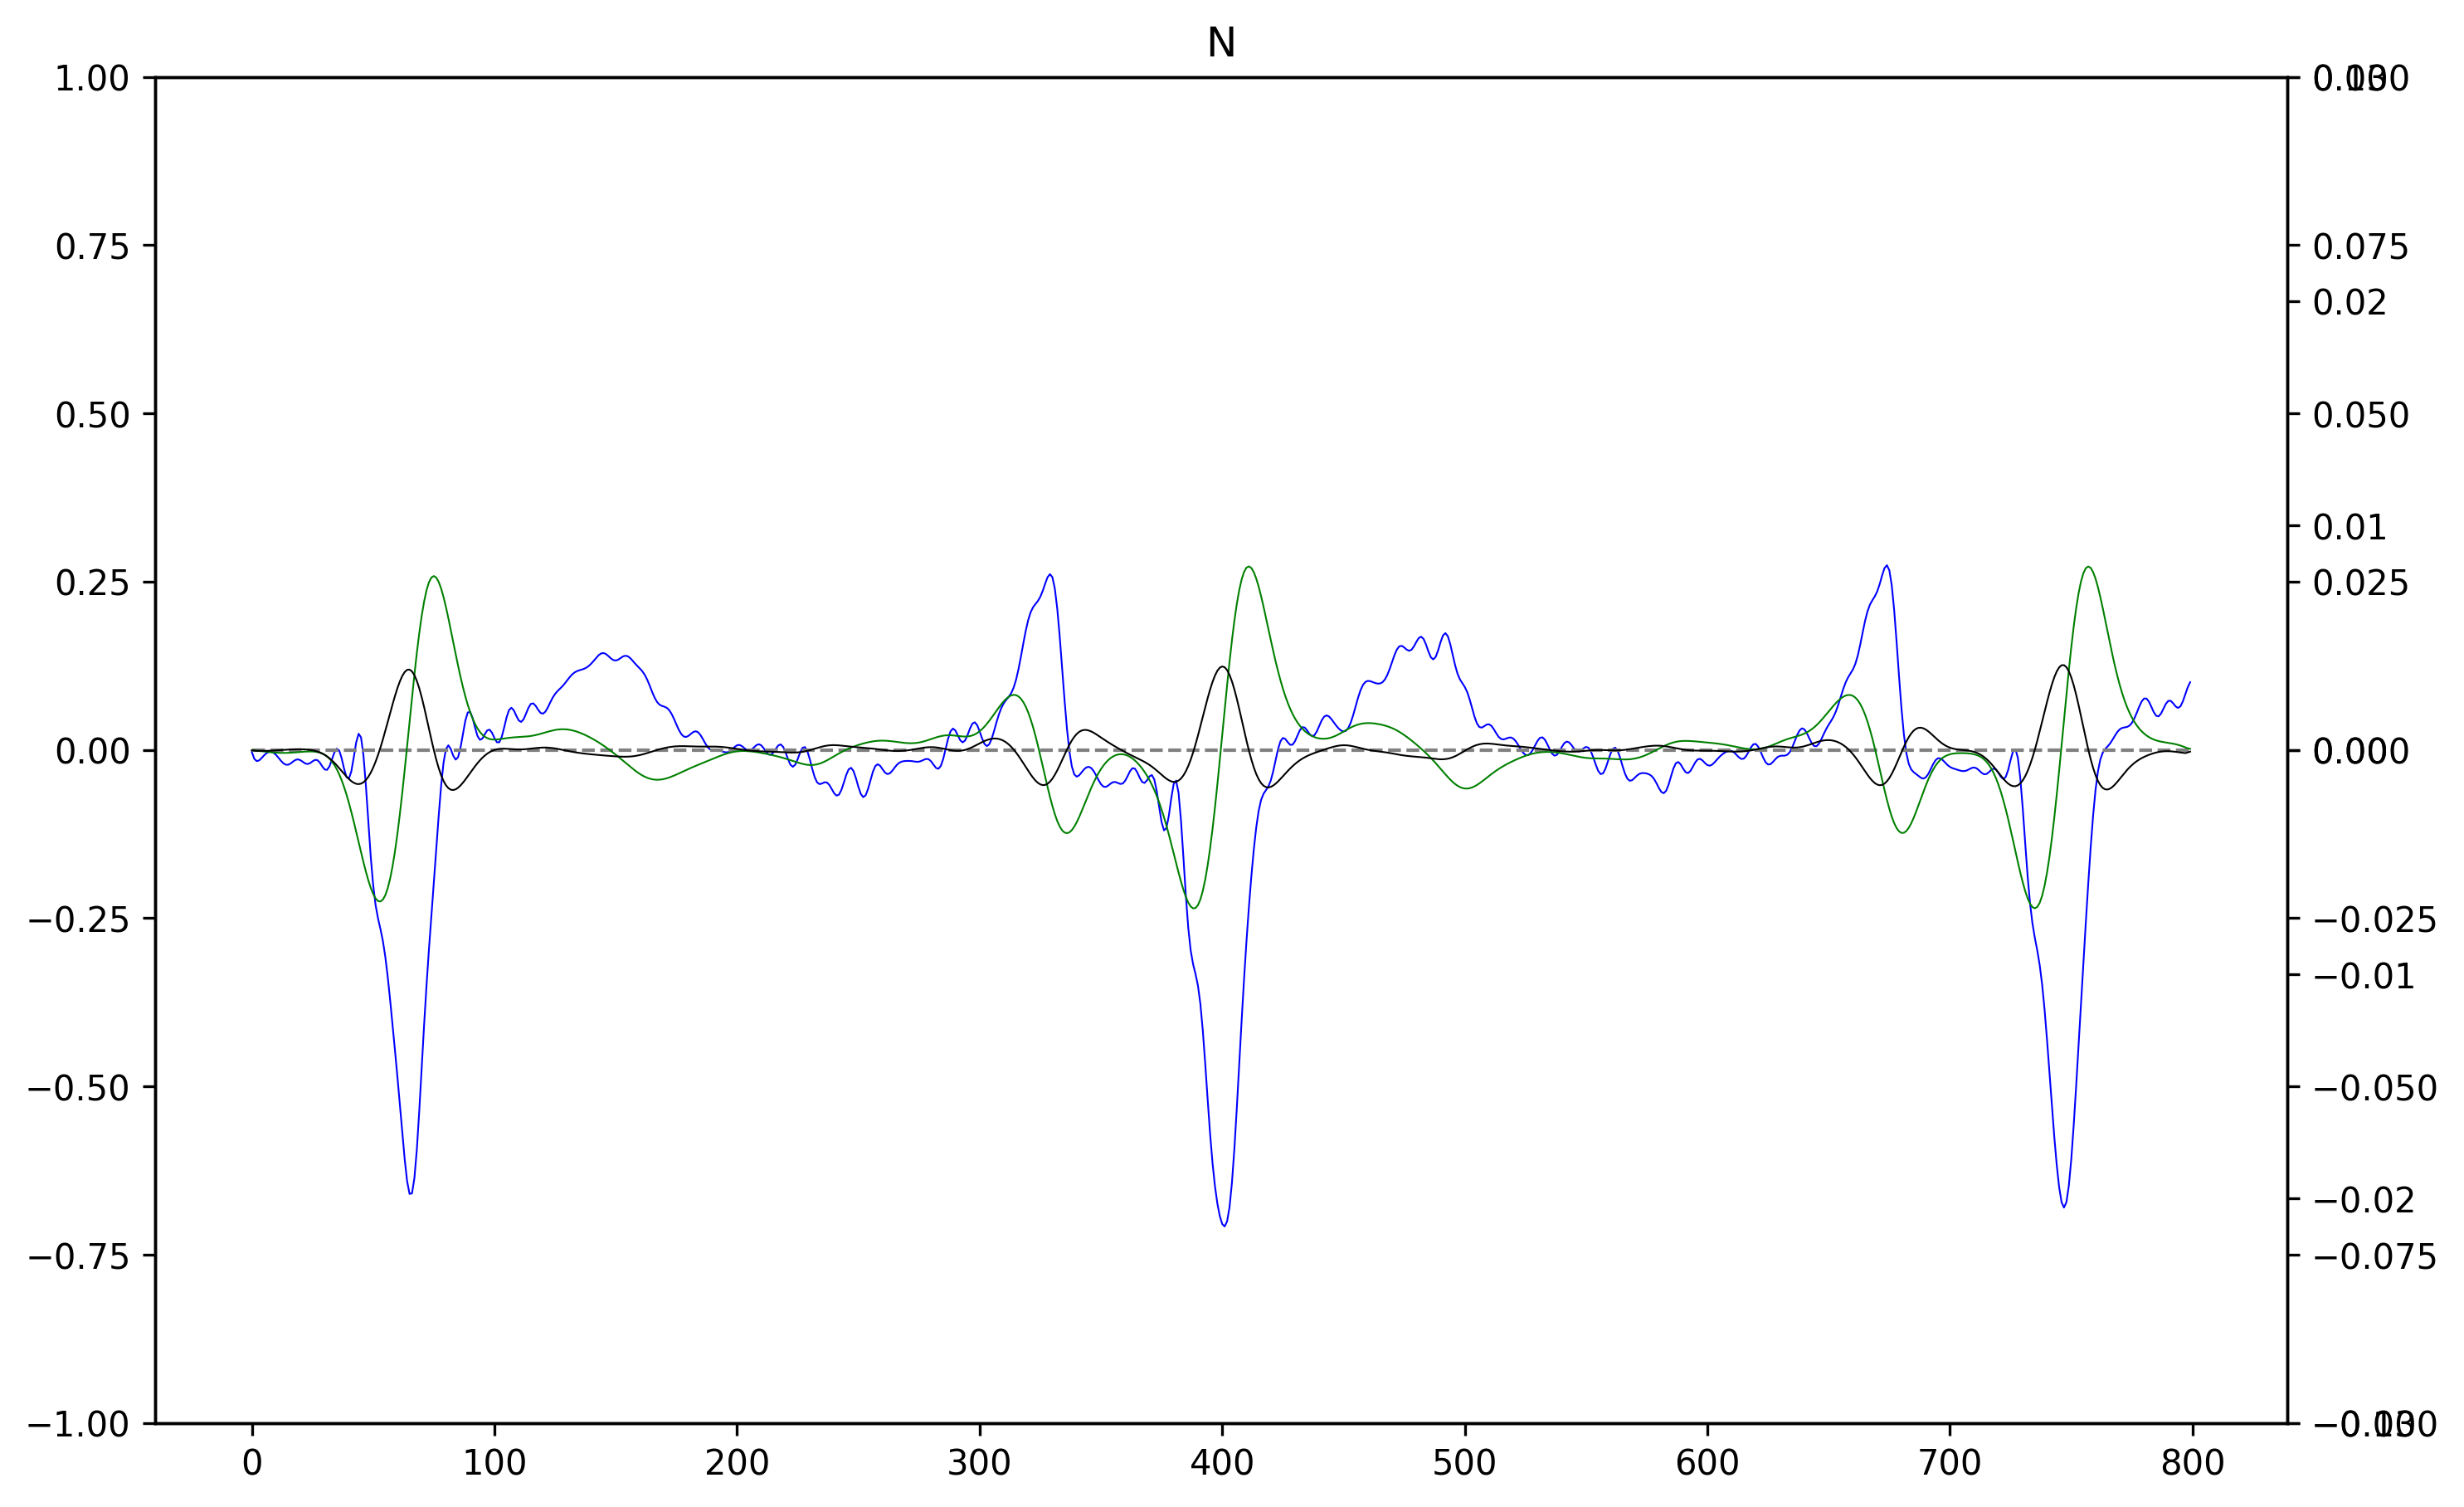

In [15]:
#plt.figure(figsize=(10,10),dpi=200)
fig,ax=plt.subplots(figsize=(10,6),dpi=300)
#beat_no=300
sig = signal_frags[beat_no]
ax.plot(sig,color='blue',linewidth=0.5)
#ax.plot(sig,linestyle=':',linewidth=1)
ax.plot(np.zeros_like(sig),color='gray',linestyle='--',linewidth=1)
ax.set_ylim(-1,1)


from scipy.ndimage import gaussian_filter1d
sig = gaussian_filter1d(sig,8)
gr = np.gradient(sig)
ax2 = ax.twinx()
ax2.plot(gr,color='green',linestyle='-',linewidth=0.5)
ax2.set_ylim(-.1,.1)
fig.tight_layout()


grgr=np.gradient(np.gradient(sig))
ax3 = ax.twinx()
ax3.plot(grgr,color='black',linestyle='-',linewidth=.5)
ax3.set_ylim(-.03,.03)
fig.tight_layout()

a=plt.title(beat_types[beat_no])


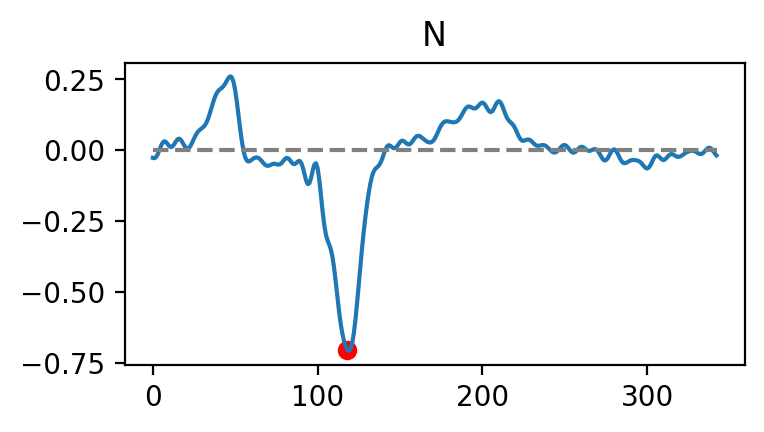

In [16]:
from pyecg.beat_info import BeatInfo
#beat_no=24
binfo = BeatInfo()
binfo({'waveform':signal_frags[beat_no],
       'rpeak':r_locs[beat_no], 
       'rec_num':[1]*len(start_idxs),
       'start_idx':start_idxs[beat_no],
       'label':labels[beat_no]})


import matplotlib.pyplot as plt
plt.figure(figsize=(4,2),dpi=200)
plt.plot(binfo.bwaveform) 
pk = binfo.reported_rpeak()
plt.scatter(pk,binfo.bwaveform[pk],color='r')
a=plt.title(beat_types[beat_no])
plt.plot(np.zeros_like(binfo.bwaveform),color='gray',linestyle='--')


In [111]:
binfo.label

'N'

In [112]:
binfo.reported_rpeak()

134

In [113]:
np.argmax(binfo.bwaveform)

63

In [114]:
from scipy.signal import find_peaks
sig = binfo.bwaveform
sigrng = max(sig)-min(sig)
peaks,prop = find_peaks(sig,height=0.05*sigrng)

In [115]:
peaks,prop

(array([ 63, 177, 194, 208, 216, 226]),
 {'peak_heights': array([0.26112168, 0.05128168, 0.10250037, 0.15461647, 0.16818479,
         0.17350626])})

In [116]:
from pyecg.pqrst import PQRST

pqrst=PQRST()

In [117]:
pqrst(binfo.bwaveform)
pqrst.qwave

[17, -0.02809807404044483]

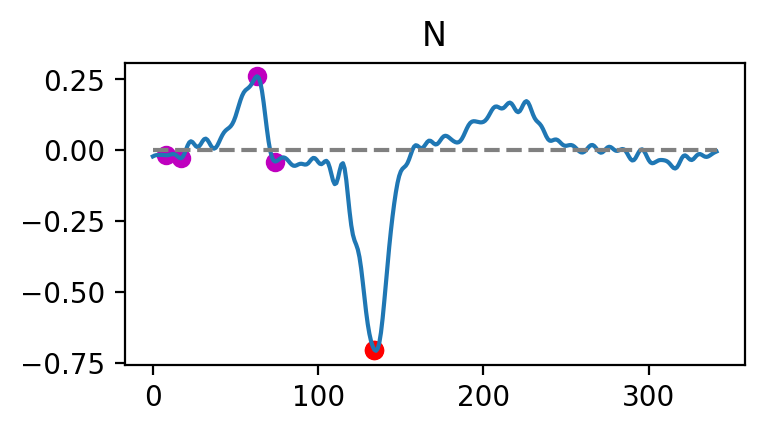

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2),dpi=200)
plt.plot(binfo.bwaveform) 
pk = binfo.reported_rpeak()
plt.scatter(pk,binfo.bwaveform[pk],color='r')
a=plt.title(beat_types[beat_no])
plt.plot(np.zeros_like(binfo.bwaveform),color='gray',linestyle='--')


plt.scatter(pk,binfo.bwaveform[pk],color='r')
plt.scatter(pqrst.pwave[0],pqrst.pwave[1],color='m')
plt.scatter(pqrst.qwave[0],pqrst.qwave[1],color='m')
plt.scatter(pqrst.rwave[0],pqrst.rwave[1],color='m')
plt.scatter(pqrst.swave[0],pqrst.swave[1],color='m')

In [120]:
pqrst.pr_interval

152.7777777777778

In [121]:
#fft of each beat waveform
from scipy.fft import rfft, rfftfreq
sig = binfo.bwaveform
num_samples = sig.size
fs = 360
xf = rfftfreq(num_samples, 1 / fs)
yf = np.abs(rfft(sig))


Text(0, 0.5, 'Amplitude')

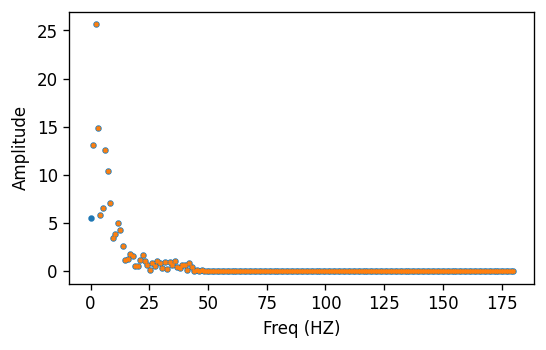

In [147]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3),dpi=120)
plt.scatter(xf, yf,s=8)
plt.scatter(xf[1:], yf[1:],s=4,marker='x') #DC removed
plt.xlabel('Freq (HZ)')
plt.ylabel('Amplitude')

In [127]:
yf.shape,xf.shape

((172,), (172,))

In [125]:
xf[2]-xf[1]

1.0526315789473684

In [124]:
list(zip(xf,yf))

[(0.0, 5.564553509262705),
 (1.0526315789473684, 13.095827940883904),
 (2.1052631578947367, 25.642267013012322),
 (3.1578947368421053, 14.915043334318737),
 (4.2105263157894735, 5.8012951943887625),
 (5.263157894736842, 6.593726958388728),
 (6.315789473684211, 12.639463883309073),
 (7.368421052631579, 10.3830231672549),
 (8.421052631578947, 7.06925196353263),
 (9.473684210526315, 3.4169784731193613),
 (10.526315789473683, 3.921913411196537),
 (11.578947368421051, 4.972571853543493),
 (12.631578947368421, 4.25523293111422),
 (13.68421052631579, 2.636282551861439),
 (14.736842105263158, 1.2185231608006457),
 (15.789473684210526, 1.2529025099271711),
 (16.842105263157894, 1.8479984013248185),
 (17.894736842105264, 1.5462056405364029),
 (18.94736842105263, 0.5544035947529251),
 (20.0, 0.5475134059744864),
 (21.052631578947366, 1.1780683943305974),
 (22.105263157894736, 1.7077753230944566),
 (23.157894736842103, 1.0353594615903394),
 (24.210526315789473, 0.6508898401919009),
 (25.2631578947

/home/mypc/anaconda3/envs/ecg/lib/python3.9/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 200 is greater than input length  = 193, using nperseg = 193
  warnings.warn('nperseg = {0:d} is greater than input length '


Text(0, 0.5, 'PSD')

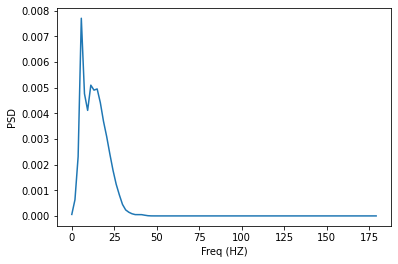

In [58]:
from scipy.signal import welch
f, Pxx_den = welch(sig, fs, nperseg=200)

import matplotlib.pyplot as plt
plt.plot(f, Pxx_den)
plt.xlabel('Freq (HZ)')
plt.ylabel('PSD')

In [ ]:
#L: DS1: 109,207 --- DS2:214,111
#R: DS1: 118,124,207 ---  DS2: 212,231,232

# Arrhythmia

In [17]:
import sys
sys.path.insert(0, '..')
import matplotlib.pyplot as plt
from pyecg.utils import load_data
from pyecg.data_arrhythmia import * 


In [18]:
#AFIBs
train_set = [201,203]
test_set = [202,210,219,221,222]

In [19]:
annotated_records, samples_info =  load_data('../data/train.arr') 

File loaded: ../data/train.arr


In [20]:
labels=[]
for sample in samples_info:
    labels.append(sample[3])
len(labels)
np.unique(labels,return_counts=True)

class_labels = list(np.unique(labels))
class_labels

['(AB', '(AFIB', '(AFL', '(B', '(BII', '(N', '(SBR']

In [21]:
training_generator = ECGSequence(annotated_records, samples_info, class_labels, batch_size=3)

In [22]:
len(samples_info)

184964

In [23]:
#create dataset
from tqdm import tqdm
batch_size=2000
labels=[]
seq=[]
rri=[]
feats =[]
training_generator = ECGSequence(annotated_records, samples_info, class_labels=None, batch_size=batch_size)
for i in tqdm(range(int(len(samples_info)/batch_size))): 
    labels.extend(training_generator.__getitem__(i)[1])
    #seq.extend(training_generator.__getitem__(i)[0][0])
    rri.extend(training_generator.__getitem__(i)[0][1])
    feats.extend(training_generator.__getitem__(i)[0][2])
#labels = np.array(labels)
feats = np.array(feats)

100%|███████████████████████████████████████████| 92/92 [02:04<00:00,  1.36s/it]


In [24]:
import pandas as pd
cols = ['meanrr','sdrr','medianrr','rangerr','nsdrr','sdsd','rmssd','nrmssd','prr50']
featdf = pd.DataFrame(feats,columns=cols)
featdf['Labels'] = labels

rridf = pd.DataFrame(rri)
rridf['Labels'] = labels

In [25]:
featdf.head(2)

,meanrr,sdrr,medianrr,rangerr,nsdrr,sdsd,rmssd,nrmssd,prr50,Labels
0,653.611084,32.537964,656.944458,105.555557,0.049782,23.715275,23.733343,0.036311,100.0,(N
1,952.777771,33.217392,947.222229,108.333336,0.034864,44.440159,45.105045,0.047341,100.0,(N


<AxesSubplot:title={'center':'rmssd'}, xlabel='Labels'>

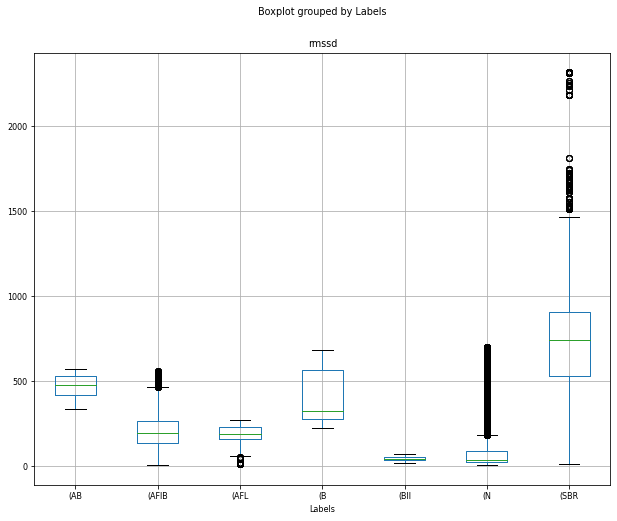

In [26]:
featdf.boxplot(column=cols[6],by='Labels',figsize=(10,8))

In [27]:
#poincare plot
rri_i = rridf.iloc[:,:9]
rri_i['Labels'] = rridf['Labels']
rri_i.head(1)

,0,1,2,3,4,5,6,7,8,Labels
0,0.705556,0.675,0.661111,0.641667,0.616667,0.6,0.622222,0.652778,0.663889,(N


In [28]:
rri_i1 = rridf.iloc[:,1:10]
rri_i1['Labels'] = rridf['Labels']
rri_i1.columns = rri_i.columns
rri_i1.head(2) 

,0,1,2,3,4,5,6,7,8,Labels
0,0.675000,0.661111,0.641667,0.616667,0.600000,0.622222,0.652778,0.663889,0.697222,(N
1,0.930556,0.925000,0.955556,0.938889,0.922222,0.972222,0.997222,1.011111,0.902778,(N


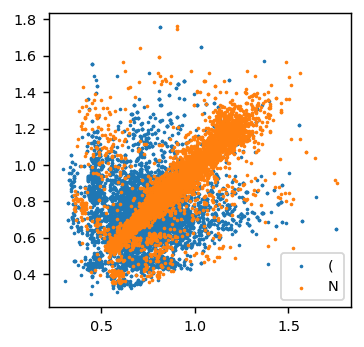

In [29]:
labels = ['(AFIB', '(N','(AFL', '(B', '(IVR', '(PREX', '(SVTA', '(T', '(VFL', '(VT']
labels = ['(AFIB', '(N']
fig = plt.figure(figsize=(3,3),dpi=130)
for label in labels:
    n=1000
    xi = rri_i[rri_i['Labels']== label]
    xi1 = rri_i1[rri_i1['Labels']== label]
    x = xi.iloc[0:n,:-1]
    y = xi1.iloc[0:n,:-1]
    
    plt.scatter(x,y,s=1)
    plt.legend(label)
    


params = {'font.size': 8
          #'legend.fontsize': 1,
          #'legend.handlelength': 10
         }
plt.rcParams.update(params)  

In [30]:
rri_i1.groupby(by='Labels').count()

,0,1,2,3,4,5,6,7,8
Labels,,,,,,,,,
(AB,209,209,209,209,209,209,209,209,209
(AFIB,26206,26206,26206,26206,26206,26206,26206,26206,26206
(AFL,731,731,731,731,731,731,731,731,731
(B,1431,1431,1431,1431,1431,1431,1431,1431,1431
(BII,3083,3083,3083,3083,3083,3083,3083,3083,3083
(N,142401,142401,142401,142401,142401,142401,142401,142401,142401
(SBR,9939,9939,9939,9939,9939,9939,9939,9939,9939


In [6]:
training_generator = ECGSequence(annotated_records, samples_info,class_labels, batch_size=3)
o=training_generator.__getitem__(1)[0][1][0]

In [7]:
#0:seq 1:rri 2:feats (0)[0][2]
len(training_generator.__getitem__(0)[0][2][0])

9

In [9]:
training_generator.__getitem__(0)[0][2][0]

array([0.795     , 0.03464547, 0.7986111 , 0.12222222, 0.04357921,
       0.04899151, 0.04923976, 0.06193681, 0.        ], dtype=float32)

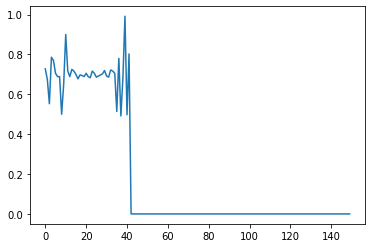

In [12]:
import matplotlib.pyplot as plt
plt.plot(training_generator.__getitem__(1)[0][1][0])

In [13]:
sig=training_generator.__getitem__(1)[0][1]
sig = [1,3,2]
sig = np.expand_dims(sig,axis=0)
sig.shape

(1, 3)

In [15]:
len(labels),len(samples_info)

(10694, 10694)

In [16]:
np.unique(labels,return_counts=True)

(array(['(AFIB', '(AFL', '(B', '(IVR', '(N', '(PREX', '(SVTA', '(T',
        '(VFL', '(VT'], dtype='<U5'),
 array([ 481,   87,  140,   26, 9810,   34,    7,   74,   23,   12]))

In [ ]:
labels = np.array(labels)
len(np.where(labels==1)[0])

In [ ]:
tlabels = []
for sample in samples_info:
    tlabels.append(RHYTHM_TYPES.index(sample[4]))

In [ ]:
tlabels = np.array(tlabels)
len(np.where(tlabels==1)[0])

In [ ]:
training_generator.__getitem__(10)

In [ ]:
training_generator.on_epoch_end()
training_generator.__getitem__(10)

In [12]:
len(samples_info_test)

2139

# rpeak & label

In [1]:
#For each 10 seconds of ecg signal output a 0-1 list with len 100. 
#For each 100ms segment if rpeak=1 else 0. [0000100100...] 

In [1]:
import sys
sys.path.insert(0, '..')
from pyecg.utils import load_data
from pyecg.data_rpeak import * 

2022-06-24 23:12:46.947047: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-24 23:12:46.947123: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-24 23:13:49.149978: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-24 23:13:49.150108: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-24 23:13:49.150178: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2022-06-24 23:13:49.156199: I tensorflow/core/platform/cpu_feature_gua

In [2]:
win_size=30*360
stride=360
interval= 36  #36 not important anymore,it is computed in ECGSequence
binary= False

annotated_records, samples_info = save_samples_rpeak(DS1,
                                                     '../data/DS1_samples.rpeak', 
                                                     win_size, stride, interval, binary) 

100%|███████████████████████████████████████████████████████| 22/22 [01:23<00:00,  3.82s/it]


File saved: ../data/DS1_samples.rpeak


In [2]:
annotated_records, samples_info =  load_data('../data/DS1_samples.rpeak') 

File loaded: ../data/DS1_samples.rpeak


In [3]:
([i for i,e in enumerate(annotated_records[0][1][:800]) if e!=0])

[83, 396, 711]

In [21]:
train_generator = ECGSequence(annotated_records, samples_info, batch_size=1, binary=False, raw=True, interval=72) 

In [22]:
train_generator.__getitem__(0)[0]

array([[ 0.12343226,  0.12812809,  0.13216271, ..., -0.04185425,
        -0.03826864, -0.03090914]])

In [23]:
train_generator.__getitem__(0)[0].shape, train_generator.__getitem__(0)[1].shape

((1, 10800), (1, 150))

In [24]:
train_generator.__getitem__(0)[1]

array([['N', '0', '0', '0', 'N', '0', '0', '0', 'N', '0', '0', '0', 'N',
        '0', '0', '0', 'N', '0', '0', '0', 'N', '0', '0', '0', '0', 'N',
        '0', '0', '0', '0', 'N', '0', '0', '0', '0', '0', 'N', '0', '0',
        '0', '0', 'N', '0', '0', '0', '0', 'N', '0', '0', '0', '0', 'N',
        '0', '0', '0', '0', 'N', '0', '0', '0', '0', 'N', '0', '0', '0',
        'N', '0', '0', '0', '0', 'N', '0', '0', '0', 'N', '0', '0', '0',
        '0', 'N', '0', '0', '0', 'N', '0', '0', '0', '0', 'N', '0', '0',
        '0', 'N', '0', '0', '0', 'N', '0', '0', '0', '0', 'N', '0', '0',
        '0', '0', 'N', '0', '0', '0', 'N', '0', '0', '0', 'N', '0', '0',
        '0', '0', 'N', '0', '0', '0', 'N', '0', '0', '0', 'N', '0', '0',
        '0', 'N', '0', '0', '0', 'N', '0', '0', '0', 'N', '0', '0', '0',
        'N', '0', '0', '0', 'N', '0', '0']], dtype='<U21')

In [9]:
from tqdm import tqdm
labels=[]
sigs = []
for i in tqdm(range(len(samples_info))): 
    labels.extend(train_generator.__getitem__(i)[1])
    sigs.extend(train_generator.__getitem__(i)[0])
    
len(labels),len(samples_info),len(sigs)

  2%|▉                                                       | 680/39072 [00:11<10:21, 61.79it/s]


KeyboardInterrupt: 

In [ ]:
np.array(labels)

In [ ]:
np.unique(labels,return_counts=True)

In [ ]:
no = 23000
interval=36
rpeak_locs = np.where(labels[no]==1)[0]*interval

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,5))
plt.plot(sigs[no])
plt.scatter(rpeak_locs,[1]*len(rpeak_locs),c='r')

In [ ]:
annotated_records, samples_info = save_samples_rpeak(DS2,
                                                     '../data/DS2_samples.rpeak', 
                                                     win_size, win_size, interval, binary)  
annotated_records, samples_info =  load_data('../data/DS2_samples.rpeak') 

 36%|████████████████████▎                                   | 8/22 [00:24<00:43,  3.07s/it]

In [ ]:
from scipy import stats
import numpy as np

In [ ]:
%%time
#subseq
#stats.skew(subseq,axis=1)
np.mean(subseq,axis=1)

In [ ]:
def calc_func(subseq):
    #np.mean(subseq,axis=1)
    stats.kurtosis(subseq,axis=1)

In [ ]:
N=1000
subseq10000 = np.random.rand(N, 36)
subseq1 = np.random.rand(1, 36)

In [ ]:
%%time
for i in range(N):
    calc_func(subseq1)

In [ ]:
%%prun -s cumulative
calc_func(subseq10000)